# Aufgabe 1 


Betrachten sie das Wilkinson Polynom

$x \to \sum_{i=1}^{20}(x-i) = a_0 + a_1x + ... + a_{19}^{19} + x^{20}$

Zeigen Sie numerisch,  dass die Bestimmung der Nullstellen instabil ist, indem Sie die Koeffizienten $a_i$ zufällig normalverteilt stören

$\tilde{a_k} = a_k(1+a^{-10}r_k) mit normalverteilter Zufallsvariable $r_k$ mit einem Erwartungswert 0 und Varianz 1 und dann die Nullstellen Plotten

In [12]:
import numpy as np
import matplotlib.pyplot as plt

[21.93046095+0.j         20.62471731+2.82912939j 20.62471731-2.82912939j
 17.67776948+4.44743538j 17.67776948-4.44743538j 14.48201058+4.77694382j
 14.48201058-4.77694382j 11.57458725+4.27344593j 11.57458725-4.27344593j
  9.15373561+3.25694348j  9.15373561-3.25694348j  7.26786338+2.04407714j
  7.26786338-2.04407714j  5.82275789+0.85807507j  5.82275789-0.85807507j
  4.85398397+0.j          4.0087953 +0.j          2.99987775+0.j
  1.999999  +0.j          1.00000001+0.j        ]


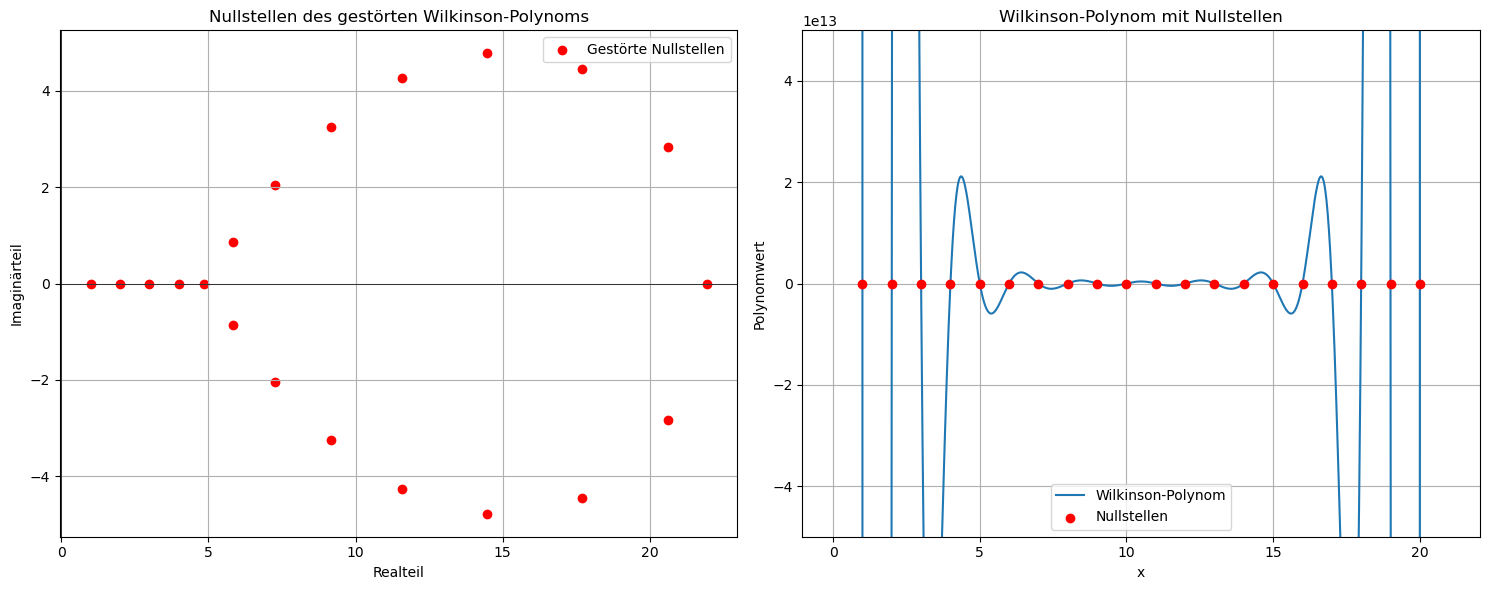

In [13]:
# Define the Wilkinson Polynomial in python

# The @ is a dunder method thus we say the wilkinson polynomials 
# take a sequency of objects as an input
@np.vectorize
def wilkinson(x):
    p = np.prod(np.array([x - i for i in range(1, 21)]))
    return p





# Ok first basically we can use np.poly for getting the coefficients

n = 20

coeffs = np.poly([i for i in range(1, n + 1)])

# For our normal distributed variable r_k we can use numpy random

x = np.linspace(0,21,1000)
"""
numpy.random.normal

Draw a random sample out of a (Gaussian) distribution

Parameters:
    loc: mean centre of distribution
    scale: standard deviation
"""

# Now we copy our coefficients, use numpy copy to naja make a copy

perturbed_coeffs = np.copy(coeffs)

for i in range(len(coeffs)):
    r_k = np.random.normal(0,1)
    perturbed_coeffs[i] = coeffs[i]*(1 + 1E-10*r_k)


# now calculate the roots of our perturbed polynomial

roots_perturbed = np.roots(perturbed_coeffs)

print(roots_perturbed)
# They are complex

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot the roots of the perturbed polynomial
axes[0].scatter(np.real(roots_perturbed), np.imag(roots_perturbed), color='red', label="Gestörte Nullstellen")
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)
axes[0].set_title("Nullstellen des gestörten Wilkinson-Polynoms")
axes[0].set_xlabel("Realteil")
axes[0].set_ylabel("Imaginärteil")
axes[0].grid(True)
axes[0].legend()

# RIght plot normal wilkinson polynomial
axes[1].plot(x, wilkinson(x), label="Wilkinson-Polynom")
axes[1].scatter(range(1, 21), np.zeros(20), color='red', zorder=5, label="Nullstellen")
axes[1].set_ylim([-5e13, 5e13])  # Beschränkung des y-Achsenbereichs
axes[1].set_title("Wilkinson-Polynom mit Nullstellen")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Polynomwert")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


# Aufgabe 2

Implementieren Sie den Algorithmus zur Berechnung der dividierenden Differenzen sowie das Horner Schema zur Auswertung eines Polynoms wie im Skriptum beschrieben. Interpolieren sie damit die Funktionen

$(a) f(x) = sin(8x^2 + 2)$
$(b) g(x) = |x|$
$(c) h(x) = \frac{1}{1+ 100x^2}$

How does the algorithm work?

Basically we have n+1 data point

$(x_0,y_0), ... , (x_n,y_n)$

where we assube $x_k$ to be pairwise distinct then we define the forward differences

$[y_k]:= y_k$ for $k \in {0,...,n}$

and $[y_k ... y_{k+j}]:= \frac{[y_{k+1}...,y_{k+j}]-[y_k,...,y_{k+1-j}]}{x_{k+j}-x_j}$

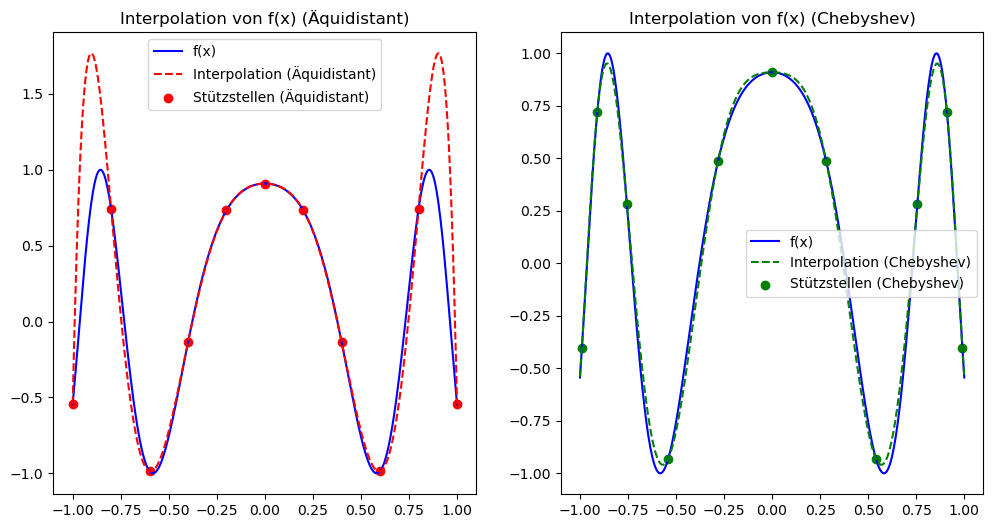

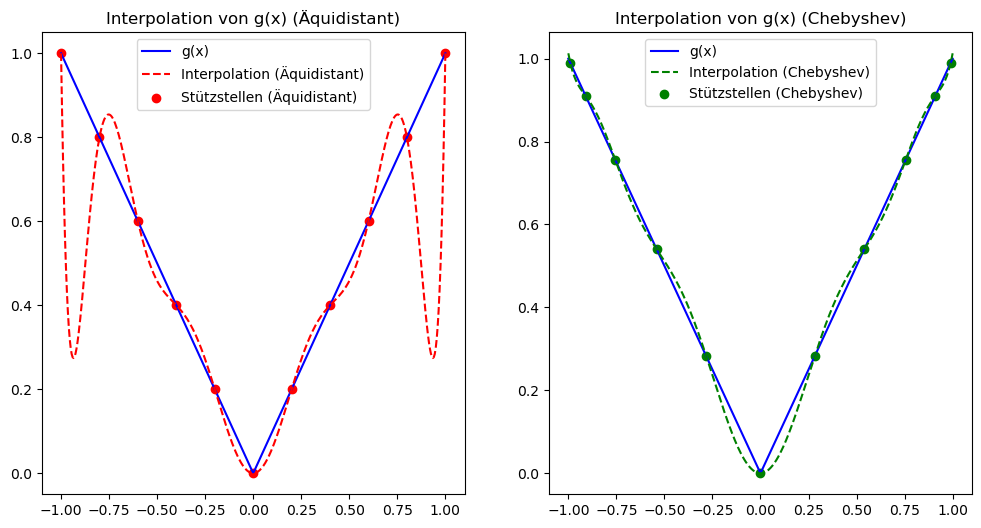

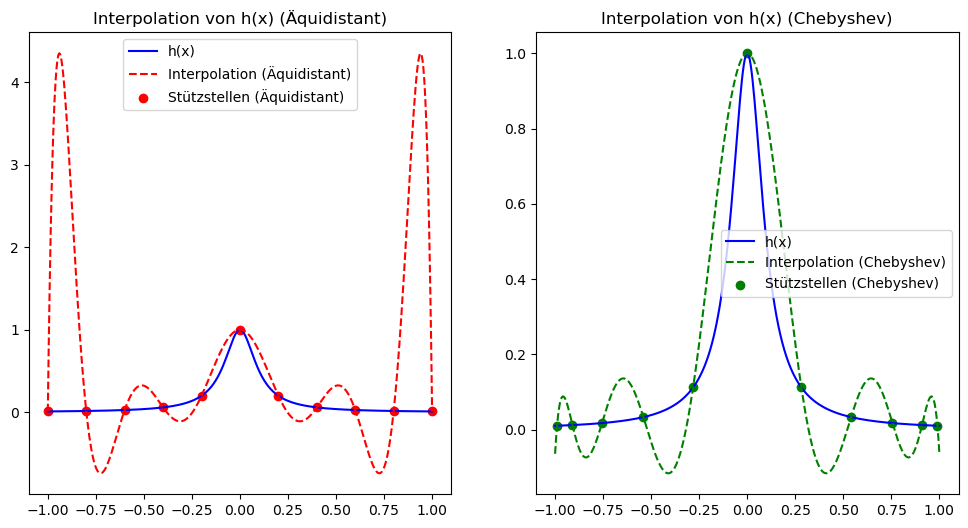

In [32]:
def divided_differences(x,y):
    """ 
    a function that returns the dividing differences table
    input are two list x,y of data points
    
    Just for the slicing technique:
    we start at index k, and end with index m

    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1,m):
        a[k:m] = (a[k:m]-a[k-1])/(x[k:m]-x[k-1])
    return a

def horner(coef, x_data, x):
    """
    Implementation of the Horneer scheme for polynomial evaluation
    Here coeff is our dividing differences table we get,


    Short explanation:
    we start with len(coeff) - 2 because the polynomial gets evaluated at the highest degree
    -1 is the stop condition meaning we stop at i=0 with our polynomial evaluation
    the last -1 tells the loop to go down -1 with each iteration
    """
    result = coef[-1]
    for i in range(len(coef) - 2, -1, -1):
        result = result * (x - x_data[i]) + coef[i]
    return result


def chebyshev_nodes(n):
    """
    Implementation of the chebyshev nodes 
    """
    return np.cos((2*np.arange(n) + 1) / (2*n) * np.pi)

# Our functions that we want to evaluate
def f(x):
    return np.sin(8 * x**2 + 2)

def g(x):
    return np.abs(x)

def h(x):
    return 1 / (1 + 100 * x**2)


def interpolate_and_plot(func, func_name):
    
    # Generate some x values on the interval of -1,1
    x_vals = np.linspace(-1, 1, 400)
    y_vals = func(x_vals)

    n = 10  # Degree was given with the exercies

    # the 10 equidistance points we generate with linspace
    x_equidistant = np.linspace(-1, 1, n+1)
    # and next we evaluate our function on this points
    y_equidistant = func(x_equidistant)

    # Now calculate chebyshev nodes and evaluate the function
    x_chebyshev = chebyshev_nodes(n+1)
    y_chebyshev = func(x_chebyshev)

    # build up the dividing differences table for the equidistance and for the cheby points
    coef_equidistant = divided_differences(x_equidistant, y_equidistant)
    coef_chebyshev = divided_differences(x_chebyshev, y_chebyshev)

    # evaluate the polynomial at each point using the equidistance and also the cheby points
    y_interp_equidistant = [horner(coef_equidistant, x_equidistant, x) for x in x_vals]
    y_interp_chebyshev = [horner(coef_chebyshev, x_chebyshev, x) for x in x_vals]

    # to plot i use subplots in this case, alternative would be fig, ax
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(x_vals, y_vals, label=f'{func_name}(x)', color='blue')
    plt.plot(x_vals, y_interp_equidistant, label='Interpolation (Äquidistant)', color='red', linestyle='--')
    plt.scatter(x_equidistant, y_equidistant, label='Stützstellen (Äquidistant)', color='red')
    plt.title(f'Interpolation von {func_name}(x) (Äquidistant)')
    plt.legend()

    # Chebyshev
    plt.subplot(1, 2, 2)
    plt.plot(x_vals, y_vals, label=f'{func_name}(x)', color='blue')
    plt.plot(x_vals, y_interp_chebyshev, label='Interpolation (Chebyshev)', color='green', linestyle='--')
    plt.scatter(x_chebyshev, y_chebyshev, label='Stützstellen (Chebyshev)', color='green')
    plt.title(f'Interpolation von {func_name}(x) (Chebyshev)')
    plt.legend()

interpolate_and_plot(f, 'f')
interpolate_and_plot(g, 'g')
interpolate_and_plot(h, 'h')

# Aufgabe 3

Bestimmen sie den Verfahrensfehler der (einseitigen) Approximation

$f'(x) \approx = \frac{3f(x)-4f(x-h)+f(x-2h)}{2h}$

Implementieren sie die Formel durch den Differenzenquotienten Skript S.43 ff in Python

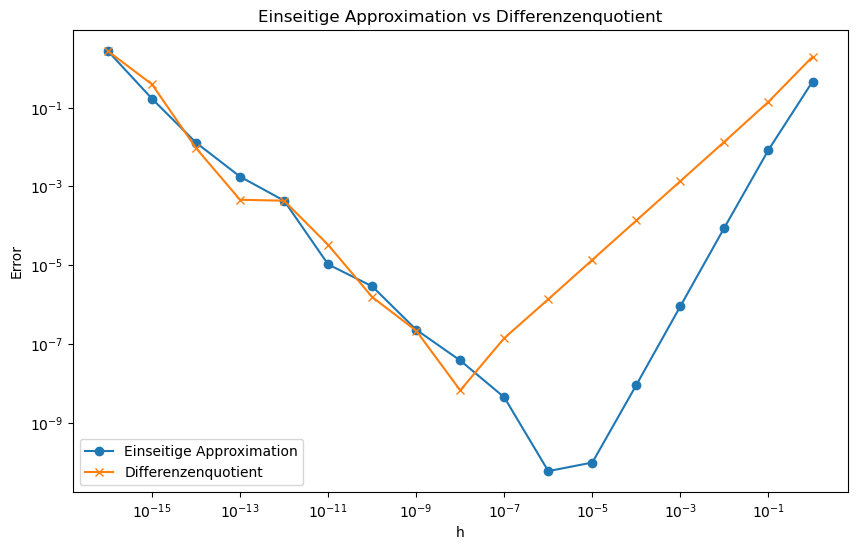

In [33]:
# Define the function
def f(x):
    return np.exp(x)
 
# Define the exact derivative e' = e
def f_prime_exact(x):
    return np.exp(x)

# Implementation of one sided derivative
def derivative_one_sided(x, h):
    return (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2*h)


def derivative_difference_quotient(x, h):
    return (f(x + h) - f(x)) / h


def absolute_error(approx, exact):
    return np.abs(approx - exact)


a = 1  
exact_value = f_prime_exact(a) 
# exact value here is e^1
js = np.arange(17)  # we want to calculate j = 0....16
hs = 10.0**(-js)

errors_one_sided = []
errors_difference_quotient = []


for h in hs:

    # Evaluate both approximation and fill up the absolute errors for each h in hs
    approx_one_sided = derivative_one_sided(a, h)
    approx_difference_quotient = derivative_difference_quotient(a, h)
    
    error_one_sided = absolute_error(approx_one_sided, exact_value)
    error_difference_quotient = absolute_error(approx_difference_quotient, exact_value)
    
    errors_one_sided.append(error_one_sided)
    errors_difference_quotient.append(error_difference_quotient)


plt.figure(figsize=(10, 6))
plt.loglog(hs, errors_one_sided, label='Einseitige Approximation', marker='o')
plt.loglog(hs, errors_difference_quotient, label='Differenzenquotient', marker='x')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Einseitige Approximation vs Differenzenquotient')
plt.legend()

plt.show()



In [34]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

print(divided_diff([0,1,2],[20,20,30]))

print(divided_differences([0,1,2],[20,20,30]))

[[20.  0.  5.]
 [20. 10.  0.]
 [30.  0.  0.]]
[20  0  5]
